# AFM Particle Detection and Average Particle Separation

http://pythonvision.org/basic-tutorial/<br>http://mahotas.readthedocs.io/en/latest/

In [1]:
import npia
#import matplotlib as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Convert image to grayscale
Code from "https://codedump.io/share/AbxxuPPXSXZQ/1/how-can-i-convert-an-rgb-image-into-grayscale-in-python"

## Import picture
update filename [par] and directory [cd] as needed

In [43]:
#dire="//Users/alex/backups/Particle Separation Analysis Photos"
#os.chdir(dire)
file='PtnanoCenk0.5et_171218_AM.0_00002_1.png'
scale_bar = 3
ub = 110.8
lb = -37.3
img=npia.Image(file,scale_bar=scale_bar, ub=ub, lb=lb)

## Show Image and Crop Scales
verify crop image shows entire picture 
if necessary adjust [ipx] and [ipy]

<class 'npia.core.Image'>


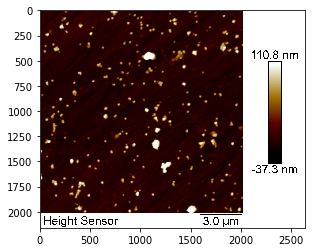

In [44]:
print(type(img))
imshow(img.image)

In [45]:
img.prepare()    #convert image from rgb to gray and crop

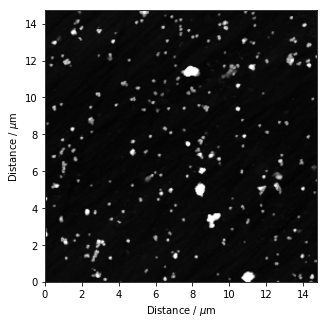

In [46]:
img.show_image('gray')

In [47]:
#img.prepare??


## Histogram analysis for Thresholding
verify that the calculated threshold is appropriate. This can have errors when the distribution is not bi modal

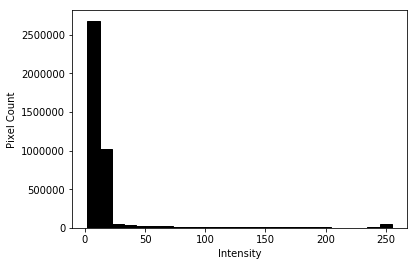

In [48]:
img.intensity_hist()

In [49]:
img.apply_threshold(upper_threshold=35)

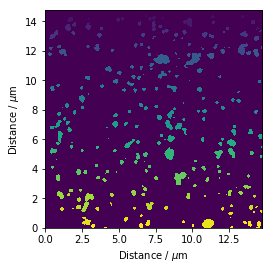

In [50]:
img.apply_otsu_threshold()
img.label_particles(T=0.5*img.threshold, f=0.7)

## Manual thresholding
In the case that there is multimodal data (>2)
If there are large particles (peak on histogram above at 255) can shrink data to maximum size of rest of data to remove effect on threshold [1st line]

move all backgroud data to 0 manually using [Ts1] from above histogram
Adjust 


C:\ProgramData\Miniconda3\lib\site-packages\mahotas\internal.py:112: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(A.dtype, np.float):


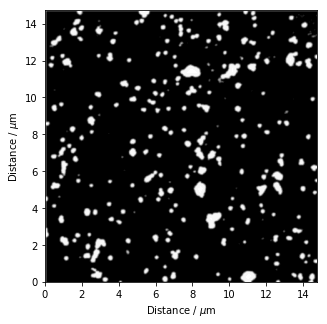

In [51]:
img.apply_gaussian_filter(sigma=5)
#img.get_com(scan_filter=(3,3))
img.show_image('gray')


### Graph a) Minimized peak heights for the large particles in an attempt to make a bimodal histogram

Graph b) Smoothed background removing smaller particles for a bimodal distribution

### Verification that the data is thresholded properly

Adjust the thresholded value if graph is not representative

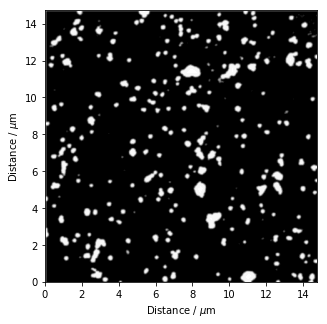

In [52]:
img.show_image('gray')
img.apply_otsu_threshold()

## Gaussian Fit to isolate particles
check Gaussian pixel fit to identify particles correctly. A good starting point is 8, with other common values (from experience) being 12,16,24,30


## Distance Transformation and watershed
reformating particles into spheres (distance transform) followed by inversion to set up watershed (particle identification and labeling)

may need to adjust Threshold value [Ta] and [thr] via dist.mean value

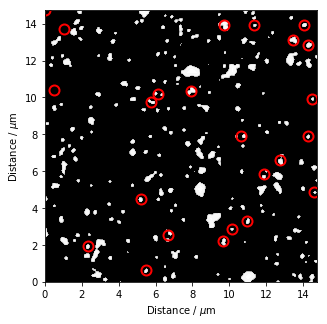

(23, 2) (207, 2)


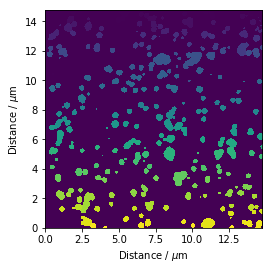

In [53]:
img.watershed(Ta = img.threshold)
#img.show_image('gray', overlay_com=img.com)
img.apply_threshold()
img.get_position()
img.get_distances(cutoff=7)
img.show_image('gray', overlay_com=img.xloc[1:])
print(shape(img.xloc[2:]),shape(img.locg))#,img.sg, img.da)
ws=imshow(img.areas, extent=[0,img.pix_to_micron*img.ipx,0,img.pix_to_micron*img.ipy])
xlabel('Distance / $\mu$m')
ylabel('Distance / $\mu$m')
savefig("watershed.png")
show()

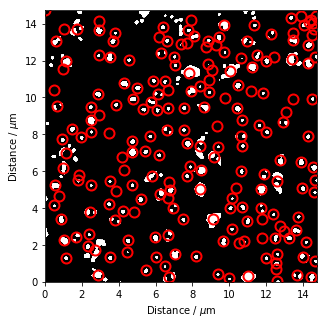

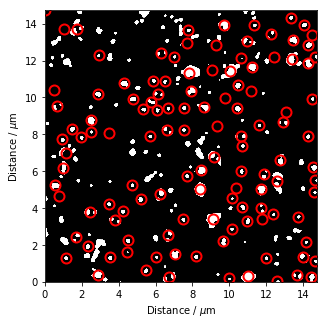

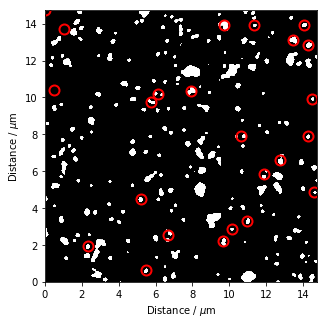

In [55]:
img.apply_threshold(upper_threshold = 25)
img.get_distances(cutoff=0.5)
filename = "0_5cutoff.png"
img.show_image('gray', overlay_com=img.xloc[1:],filename=filename)
show()

img.get_distances(cutoff=3)
filename = "3cutoff.png"
img.show_image('gray', overlay_com=img.xloc[1:],filename=filename)
show()

img.get_distances(cutoff=7)
filename = "7cutoff.png"
img.show_image('gray', overlay_com=img.xloc[1:],filename=filename)
show()

In [28]:
img.Particle_Separation_Analysis(cutoff=5)
img.new_particle_distances

<bound method Image.new_particle_distances of <npia.core.Image object at 0x000001BA80335160>>

## Particle Distribution
Calculation of size and surface density calculation
Verify labeled areas correlate to above thresholded image 

## Particle Separation Analysis
Calculating the partilce separation
Normalization and pythagorean separation show extremely close calculation fo particle separation so that they are in agreement with one another. 

In [15]:
ssx=pc*ipx
ssy=pc*ipy

NameError: name 'pc' is not defined

### Pause before storing results and parameters

In [ ]:
input('Press enter to continue')

### Store results and parameters of results in one file

In [ ]:
df=pd.read_csv("/Users/alex/backups/Particle Separation Analysis Photos/Particle Analysis.csv")
dfp=pd.read_csv("/Users/alex/backups/Particle Separation Analysis Photos/Particle Analysis Parameters.csv")

df=df.append({'dir':dire,'file':file,'pr_mean':pr_mean,'pr_med':pr_med,'pr_std':pr_std,'da_mean':da_mean,'da_std':da_std,'rho':rho,'spr':spr,'ssx':ssx,'ssy':ssy,'n_seeds':n_seeds},ignore_index=True)
dfp=dfp.append({'dir':dire,'file':file,'Ti':Ti,'Ts1':Ts1,'Ts':Ts,'Tb':Tb,'gf':gf,'Ta':Ta,'thr':th},ignore_index=True)
print(df)
print(dfp)
df.to_csv("/Users/alex/backups/Particle Separation Analysis Photos/Particle Analysis.csv")
dfp.to_csv("/Users/alex/backups/Particle Separation Analysis Photos/Particle Analysis Parameters.csv")